# KNeighbors Classifier

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### 1. Data

In [6]:
dataIris = load_iris()
df = pd.DataFrame(
    dataIris['data'],
    columns = ['SL', 'SW', 'PL','PW']
)
df['target'] = dataIris['target']
df['spesies'] = df['target'].apply(
    lambda row: dataIris['target_names'][row]
)
df.head()

,SL,SW,PL,PW,target,spesies
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### 2. splitting

In [8]:
xtr, xts, ytr, yts = train_test_split(
    df[['SL', 'SW', 'PL','PW']],
    df['target'],
    test_size = .05
)
len(xtr)

142

In [10]:
len(xts)

8

### 3. model knn classifier

In [12]:
# 1. mencari nilai k terbaik di knn
#sqrt(total data point) => sqrt(len(xtr) + len (xts))

#2. pilih yg ganjil

def nilai_k():
    k = round((len(xtr) + len (xts)) ** .5)
    if (k % 2 == 0):
        return k+1
    else:
        return k

nilai_k()

13

In [14]:
model = KNeighborsClassifier(
    n_neighbors = nilai_k()
)
model.fit(xtr, ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

### 4. predict

In [15]:
xts.iloc[0]

SL    5.5
SW    2.4
PL    3.7
PW    1.0
Name: 81, dtype: float64

In [17]:
model.predict([xts.iloc[0]])

array([1])

In [19]:
yts.iloc[0]

1

In [21]:
model.predict_proba([xts.iloc[0]])

array([[0., 1., 0.]])

In [23]:
# predict for all data
model.predict(df[['SL', 'SW', 'PL','PW']])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
# create new dataframe
df['pred'] = model.predict(df[['SL', 'SW', 'PL','PW']])
df.head()

,SL,SW,PL,PW,target,spesies,pred
0,5.1,3.5,1.4,0.2,0,setosa,0
1,4.9,3.0,1.4,0.2,0,setosa,0
2,4.7,3.2,1.3,0.2,0,setosa,0
3,4.6,3.1,1.5,0.2,0,setosa,0
4,5.0,3.6,1.4,0.2,0,setosa,0


### 5. plotting

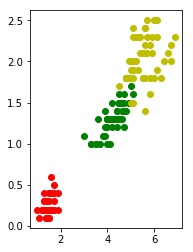

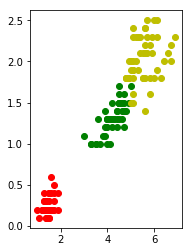

In [36]:
# data asli PL vs PW
plt.subplot(121)
plt.plot(
    df[df['target'] == 0]['PL'],
    df[df['target'] == 0]['PW'],
    'ro'  
)
plt.plot(
    df[df['target'] == 1]['PL'],
    df[df['target'] == 1]['PW'],
    'go'  
)
plt.plot(
    df[df['target'] == 2]['PL'],
    df[df['target'] == 2]['PW'],
    'yo'  
)
plt.show()

# data prediksi PL vs PW
plt.subplot(122)
plt.plot(
    df[df['pred'] == 0]['PL'],
    df[df['pred'] == 0]['PW'],
    'ro'  
)
plt.plot(
    df[df['pred'] == 1]['PL'],
    df[df['pred'] == 1]['PW'],
    'go'  
)
plt.plot(
    df[df['pred'] == 2]['PL'],
    df[df['pred'] == 2]['PW'],
    'yo'  
)
plt.show()